<a href="https://colab.research.google.com/github/Bhayazeed/Belajar_Pytorch/blob/main/Intro_To_Torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#Belajar

##Lists

In [2]:
my_list = [[1,2,3,4,5],[6,7,8,9,10]]
my_list

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

##Numpy Arrays

In [3]:
np1 = np.random.rand(3,4)
np1

array([[0.69065992, 0.18307259, 0.97163003, 0.17921787],
       [0.40067502, 0.91380141, 0.85267528, 0.70768312],
       [0.75187301, 0.30051055, 0.88983616, 0.23920773]])

In [4]:
np1.dtype

dtype('float64')

##Tensors

In [5]:
tensor_2d = torch.rand(3,4)
tensor_2d
tensor_2d.dtype

torch.float32

In [6]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
##Create tensor out of numpy array
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.6907, 0.1831, 0.9716, 0.1792],
        [0.4007, 0.9138, 0.8527, 0.7077],
        [0.7519, 0.3005, 0.8898, 0.2392]], dtype=torch.float64)

##Tensor Operations

In [8]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
#reshape and view
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [10]:
my_torch = my_torch.view(5,2)
my_torch

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [11]:
#reshape if we dont know the number of items using -1
my_torch2 = torch.arange(10)
my_torch2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
my_torch2 = my_torch2.reshape(2, -1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [13]:
my_torch2 = my_torch2.reshape(-1, 5)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

##Tensor Math Operations

In [14]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [15]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [16]:
#Addition longhand
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [17]:
#subtraction
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [18]:
#sub function
torch.sub(tensor_b, tensor_a)

tensor([4, 4, 4, 4])

In [19]:
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [20]:
#mul function
torch.mul(tensor_a, tensor_b)

tensor([ 5, 12, 21, 32])

In [21]:
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [22]:
#Division Longhand
torch.div(tensor_b, tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [23]:
tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [24]:
#remainder longhand
torch.remainder(tensor_b, tensor_a)

tensor([0, 0, 1, 0])

In [25]:
#Perpangkatan
torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [26]:
#tensor_a = tensor_a + tensor_b
tensor_a.add_(tensor_b)
tensor_a

tensor([ 6,  8, 10, 12])

##Build Basic NN

In [27]:
#Create a Model class that inherits the nn module
class Model(nn.Module):
  #input layer (4 feature of the flower) ->
  # Hidden layer 1 (number of neurons) ->
  # H2 (n) ->
  # Output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instance the nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [28]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

In [29]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
#replace/map species to int
my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)
my_df

<ipython-input-30-083b1fa4458a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
#Train test and split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [32]:
#Convert to numpy arrays
X = X.values
y = y.values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [34]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [35]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
#Set criterion of model to measure error, how far off the prediction
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [37]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [38]:
#Train model
#Epochs
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1225672960281372
Epoch: 10 and loss: 1.0130739212036133
Epoch: 20 and loss: 0.8195203542709351
Epoch: 30 and loss: 0.5979762673377991
Epoch: 40 and loss: 0.41400161385536194
Epoch: 50 and loss: 0.2843181788921356
Epoch: 60 and loss: 0.19448624551296234
Epoch: 70 and loss: 0.1376158446073532
Epoch: 80 and loss: 0.10318295657634735
Epoch: 90 and loss: 0.08392063528299332


Text(0.5, 0, 'Epoch')

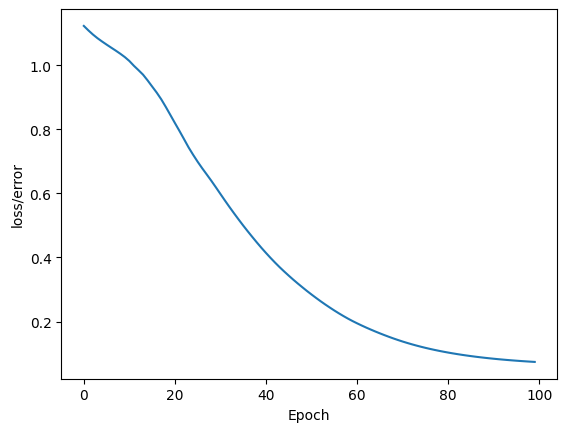

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [40]:
#Evaluate Model on test data set
with torch.no_grad():
  y_eval = model.forward(X_test) #X_test are feature from test set, y_eval is prediction
  loss = criterion(y_eval, y_test)

loss


tensor(0.0575)

In [41]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}') #what the type of flower predicted

    #correct
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-4.1716,  5.0314,  2.5291]) 	 Versicolor 	 1
2.) tensor([ 5.1330, -2.7781, -3.1771]) 	 Setosa 	 0
3.) tensor([ 4.0230, -1.7534, -2.6876]) 	 Setosa 	 0
4.) tensor([-4.6494,  5.5576,  2.7156]) 	 Versicolor 	 1
5.) tensor([-6.2048,  4.2263,  6.8880]) 	 Virginica 	 2
6.) tensor([-7.5163,  5.6673,  7.4118]) 	 Virginica 	 2
7.) tensor([ 3.5807, -1.3334, -2.5046]) 	 Setosa 	 0
8.) tensor([ 4.5113, -2.2228, -2.8847]) 	 Setosa 	 0
9.) tensor([-4.2756,  5.4891,  2.1708]) 	 Versicolor 	 1
10.) tensor([ 4.4995, -2.1908, -2.8975]) 	 Setosa 	 0
11.) tensor([-4.7794,  5.8376,  2.5969]) 	 Versicolor 	 1
12.) tensor([-7.2882,  4.4892,  8.3679]) 	 Virginica 	 2
13.) tensor([-2.9024,  4.6610,  0.8063]) 	 Versicolor 	 1
14.) tensor([-3.0202,  4.8000,  0.8698]) 	 Versicolor 	 1
15.) tensor([-6.6180,  4.7994,  6.8852]) 	 Virginica 	 2
16.) tensor([-6.8650,  3.8245,  8.4278]) 	 Virginica 	 2
17.) tensor([-4.4567,  4.8932,  3.1672]) 	 Versicolor 	 1
18.) tensor([-6.0071,  4.8364,  5.8129]) 	 Virgi

##Try Predicting with our Data

In [42]:
new_iris = torch.tensor([5.9,	3.0,	5.1,	1.8	])

In [43]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([-6.0356,  4.4154,  6.3700])
2


##Save NN Model

In [44]:
#Save Model
torch.save(model.state_dict(), 'iris_pred_model.pt')

In [45]:
#Load saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_pred_model.pt'))

<ipython-input-45-d23b86f70976>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_pred_model.pt'))


<All keys matched successfully>

In [46]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

#Latihan 1 Model Obesitas

##Data

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, LambdaLR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from imblearn.combine import SMOTEENN

In [48]:
data_obesitas = pd.read_csv('https://raw.githubusercontent.com/mdaninas/C242-PS006/refs/heads/ML/data/obesity/updated_obesitas_prediction.csv')

In [49]:
data_obesitas

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1
1,0,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1
2,1,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1
3,1,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,2
4,1,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
2081,0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,3
2082,0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,3
2083,0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,3
2084,0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,3


In [50]:
features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [51]:
#Train test and split
X_obes = data_obesitas[features]
y_obes = data_obesitas['NObeyesdad']

In [52]:
X_obes = X_obes.values
y_obes = y_obes.values

In [53]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_obes, y_obes)

In [54]:
X_tensor = torch.FloatTensor(X_resampled)
y_tensor = torch.LongTensor(y_resampled)

In [55]:
X_train_obes, X_test_obes, y_train_obes, y_test_obes = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [56]:
X_train_obes = torch.FloatTensor(X_train_obes)
X_test_obes = torch.FloatTensor(X_test_obes)

In [57]:
y_train_obes = torch.LongTensor(y_train_obes)
y_test_obes = torch.LongTensor(y_test_obes)

In [58]:
train_dataset_obes = TensorDataset(X_train_obes, y_train_obes)
test_dataset_obes = TensorDataset(X_test_obes, y_test_obes)

In [59]:
train_loader = DataLoader(train_dataset_obes, batch_size=64, num_workers=4, shuffle=True,pin_memory=True)
test_loader = DataLoader(test_dataset_obes, batch_size=64, num_workers=4, shuffle=False,pin_memory=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [60]:
for batch in train_loader:
    X_batch, y_batch = batch
    print(X_batch.shape, y_batch.shape)

torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
torch.Size([64, 9]) torch.Size([64])
t

##Pembuatan Model

In [61]:
class modelobesitas(nn.Module):
  def __init__(self, input_size):
    super(modelobesitas, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(input_size, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(0.1)
    )

    self.layer2 = nn.Sequential(
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Dropout(0.1)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(512, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64)
    )

    self.output_layer = nn.Sequential(
        nn.Linear(64, 4),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.output_layer(x)
    return x

In [62]:
print(X_train_obes.shape[1])

9


In [63]:
model = modelobesitas(input_size=X_train_obes.shape[1])

In [64]:
def train_model(model, train_loader, test_loader, num_epochs=100):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.to(device)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.0001)

  reduce_lr = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True, min_lr=1e-6)

  def lr_lambda(epoch):
    return 0.1 if epoch >= 50 else 1.0

  lr_scheduler = LambdaLR(optimizer, lr_lambda)

  history = {
      'train_loss': [],
      'train_acc': [],
      'val_loss': [],
      'val_acc': []
  }

  best_val_acc = 0.0

  for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    train_loss = train_loss / len(train_loader)

        # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100. * correct / total
    val_loss = val_loss / len(test_loader)

        # Update learning rate schedulers
    reduce_lr.step(val_acc)
    lr_scheduler.step()

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'Saved best model with validation accuracy: {val_acc:.2f}%')


    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} Train Acc: {train_acc:.2f}% '
          f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.2f}%')

  return history

In [65]:
history = train_model(model, train_loader, test_loader)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Saved best model with validation accuracy: 74.69%
Epoch [1/100] Train Loss: 1.1556 Train Acc: 68.01% Val Loss: 1.0730 Val Acc: 74.69%
Saved best model with validation accuracy: 75.66%
Epoch [2/100] Train Loss: 1.0588 Train Acc: 74.51% Val Loss: 1.0205 Val Acc: 75.66%
Saved best model with validation accuracy: 79.97%
Epoch [3/100] Train Loss: 1.0319 Train Acc: 75.56% Val Loss: 0.9916 Val Acc: 79.97%
Saved best model with validation accuracy: 80.39%
Epoch [4/100] Train Loss: 1.0105 Train Acc: 77.50% Val Loss: 0.9758 Val Acc: 80.39%
Saved best model with validation accuracy: 82.48%
Epoch [5/100] Train Loss: 0.9957 Train Acc: 79.10% Val Loss: 0.9612 Val Acc: 82.48%
Saved best model with validation accuracy: 83.59%
Epoch [6/100] Train Loss: 0.9863 Train Acc: 78.16% Val Loss: 0.9555 Val Acc: 83.59%
Epoch [7/100] Train Loss: 0.9759 Train Acc: 79.87% Val Loss: 0.9443 Val Acc: 83.59%
Saved best model with validation accuracy: 84.84%
Epoch [8/100] Train Loss: 0.9770 Train Acc: 79.21% Val Loss: 0

In [66]:
def plot_training_history(history):
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation loss
    ax1.plot(history['train_loss'], label='Training Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper right')
    ax1.grid(True)

    # Plot training & validation accuracy
    ax2.plot(history['train_acc'], label='Training Accuracy')
    ax2.plot(history['val_acc'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend(loc='lower right')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

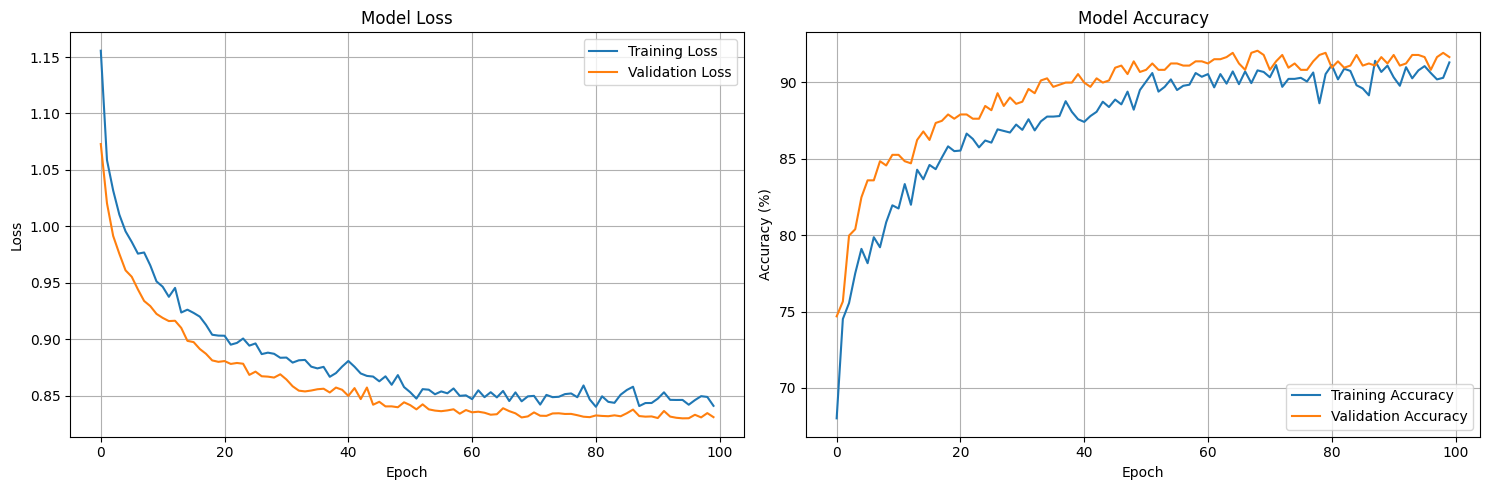

In [67]:
plot_training_history(history)

##Test Predict Data

In [68]:
A = torch.tensor([[1,	46.0,	1.,	64.0,	2.0,	3.0,	2.0,	0.0,	1.0	]])

In [78]:
B = torch.tensor([[1,	27.0,	1.80,	87.0,	3.0,	3.0,	2.0,	2.0,	0.0	]])

In [80]:
def predict(model, input_data):
    with torch.no_grad():
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        input_data = input_data.to(device)
        prediction = model.forward(input_data)
        predicted_class = prediction.argmax().item()
        return prediction, predicted_class

In [81]:
predict(model, A)

(tensor([[3.7472e-10, 1.0000e+00, 7.0640e-09, 9.5217e-14]], device='cuda:0'),
 1)

In [82]:
predict(model, B)

(tensor([[8.5079e-04, 9.9906e-04, 9.9154e-01, 6.6110e-03]], device='cuda:0'),
 2)

In [90]:
correct = 0
with torch.no_grad():
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.to(device)
  for i, data in enumerate(X_test_obes):
    data = data.to(device)
    # Add a batch dimension to data using unsqueeze(0)
    data = data.unsqueeze(0)
    y_val = model.forward(data)

    # Adjust conditionals for the correct number of classes (4 in this case)
    if y_test_obes[i] == 0:  # Use y_test_obes for indexing
      x = "Under_weight"
    elif y_test_obes[i] == 1:
      x = "Normal_weight"
    elif y_test_obes[i] == 3:
      x = "Overweight"
    else:
      x = "Obesity"

    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    #correct
    if y_val.argmax().item() == y_test_obes[i]:  # Use y_test_obes for comparison
      correct += 1

print(f'\n{correct} out of {len(y_test_obes)} = {100*correct/len(y_test_obes)}% correct')  # Use len(y_test_obes)

1.) tensor([[2.1497e-04, 4.4463e-03, 9.9391e-01, 1.4244e-03]], device='cuda:0') 	 Obesity 	 2
2.) tensor([[0.0013, 0.0020, 0.6627, 0.3341]], device='cuda:0') 	 Obesity 	 2
3.) tensor([[8.2730e-05, 9.9979e-01, 1.2042e-04, 8.4816e-06]], device='cuda:0') 	 Normal_weight 	 1
4.) tensor([[9.9334e-01, 4.2364e-03, 4.2484e-04, 2.0003e-03]], device='cuda:0') 	 Under_weight 	 0
5.) tensor([[9.8534e-04, 7.4978e-04, 3.0191e-02, 9.6807e-01]], device='cuda:0') 	 Overweight 	 3
6.) tensor([[8.4942e-04, 1.3056e-03, 8.6692e-01, 1.3092e-01]], device='cuda:0') 	 Obesity 	 2
7.) tensor([[3.1486e-04, 9.9913e-01, 5.3454e-04, 2.5181e-05]], device='cuda:0') 	 Normal_weight 	 1
8.) tensor([[0.9816, 0.0133, 0.0011, 0.0040]], device='cuda:0') 	 Normal_weight 	 0
9.) tensor([[9.9098e-01, 7.4765e-03, 7.6811e-04, 7.7485e-04]], device='cuda:0') 	 Under_weight 	 0
10.) tensor([[1.0689e-04, 4.4547e-03, 9.9146e-01, 3.9738e-03]], device='cuda:0') 	 Obesity 	 2
11.) tensor([[9.8593e-01, 1.1448e-02, 7.4184e-04, 1.8807e-03